In [193]:
import numpy as np
from matplotlib import pyplot as plt

In [316]:
fNames = ["input", "test1", "test2", "test3"]
with open(fNames[0]) as f:
    input = [list(l.strip("\n")) for l in f.readlines()]

len(input)

140

In [317]:
surface = np.array(input)
start_coord = np.argwhere(surface == "S")[0]
start_coord

array([26, 31])

In [318]:
pipes = {
    "|": ["N", "S"],
    "-": ["E", "W"],
    "L": ["N", "E"],
    "J": ["N", "W"],
    "7": ["S", "W"],
    "F": ["S", "E"],
}

valid_pipes = pipes.keys()
inverts = {f: t for f, t in zip(list("NSEW"), list("SNWE"))}


def move(coord: [int], move: str):
    m = {"N": [-1, 0], "S": [1, 0], "W": [0, -1], "E": [0, 1]}
    return coord + m[move]


def get_surrounding(surface, coord):
    [row, col] = coord
    return surface[row - 1 : row + 2, col - 1 : col + 2]


def print_surrounding(surface, coord):
    print(f"{coord = }")
    print(get_surrounding(surface, coord))
    print()


def get_next_dir(curr_dir, pipe_value):
    if pipe_value == "S":
        return "S"
    invert = inverts[curr_dir]
    for n in pipes[pipe_value]:
        if invert != n:
            return n


def traverse(surface: np.ndarray, start_coord):
    surf = surface.copy()
    curr_pos = start_coord
    curr_value = surf[*curr_pos]
    next_dir = get_next_dir(None, curr_value)
    # we know that s in the inputs file is a '|' so we can go N or S
    # print(next_dir, curr_pos)
    # so we are going to start by going south
    while True:
        surf[*curr_pos] = "X"
        # print(curr_value, curr_pos)
        curr_pos = move(curr_pos, next_dir)
        curr_value = surf[*curr_pos]
        if curr_value not in valid_pipes:
            return surf
        next_dir = get_next_dir(next_dir, curr_value)


n_surface = traverse(surface, start_coord)
print(n_surface)
np.sum(n_surface == "X") // 2

[['F' 'F' 'F' ... '7' '-' '7']
 ['-' '|' '.' ... 'J' '.' 'L']
 ['L' '-' 'J' ... '.' 'J' '|']
 ...
 ['7' '|' '|' ... '-' '|' '|']
 ['|' 'F' 'L' ... '-' '7' '7']
 ['J' 'L' 'L' ... 'J' 'L' '|']]


6599

In [319]:
n_surface != "."

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True, False,  True],
       [ True,  True,  True, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [320]:
n_surface

array([['F', 'F', 'F', ..., '7', '-', '7'],
       ['-', '|', '.', ..., 'J', '.', 'L'],
       ['L', '-', 'J', ..., '.', 'J', '|'],
       ...,
       ['7', '|', '|', ..., '-', '|', '|'],
       ['|', 'F', 'L', ..., '-', '7', '7'],
       ['J', 'L', 'L', ..., 'J', 'L', '|']], dtype='<U1')

In [321]:
# np.array([128], dtype=int).dtype
128*2

256

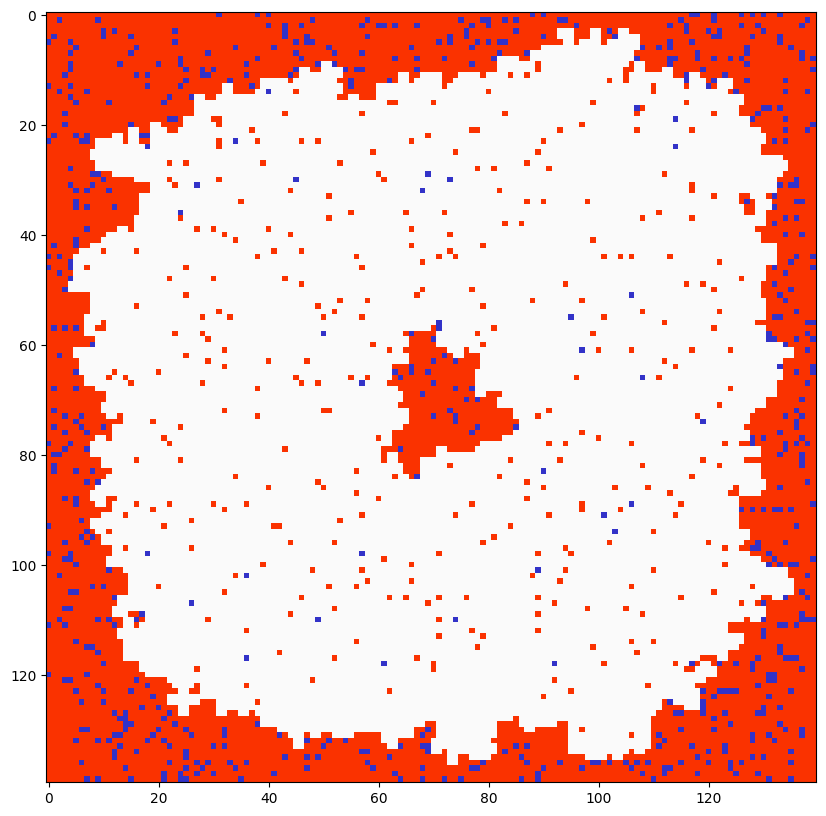

In [323]:
img = np.full((*n_surface.shape, 3), (255,255,255)) 
img[surface == "."] = (50, 50, 200)
img[surface != "."] = (250, 50, 0)
# img[n_surface in np.array(valid_pipes)] = (0, 100,0)
img[n_surface == "X"] = (250,250,250)

a = plt.imshow(img)
a.figure.set_size_inches((10,10))
# img

## Part 2

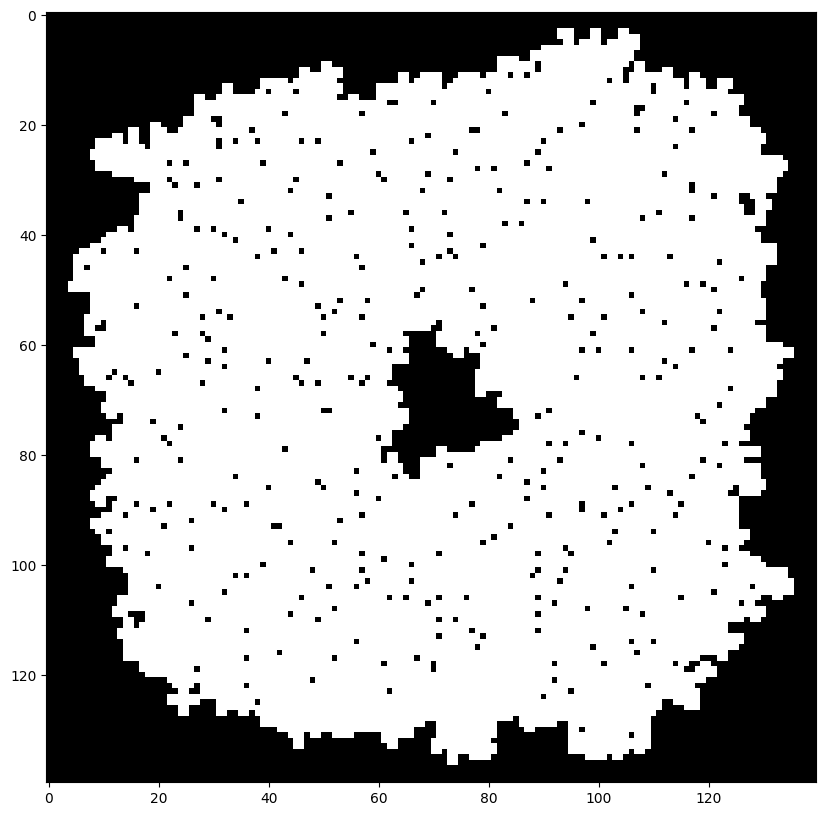

In [377]:
region = np.zeros(n_surface.shape) 
region[n_surface == 'X'] = 10
for row in range(region.shape[0]):
  for col in range(region.shape[1]):
    region[row, :]
a = plt.imshow(region, cmap='gray')
a.figure.set_size_inches((10,10))


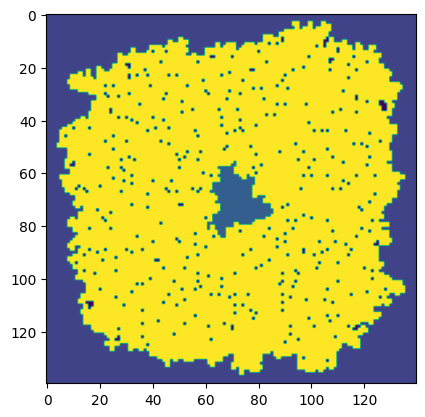

In [381]:
import numpy as np
from collections import deque

def paint_bucket(array, start_coords, new_color):
    """
    Change all connected zeros to a given color starting from the specified coordinates.

    Parameters:
    - array: 2D numpy array
    - start_coords: Tuple (row, column) specifying the starting coordinates
    - new_color: Value to set for the zeros

    Returns:
    - Updated array
    """
    start_x, start_y = start_coords
    original_color = array[start_x, start_y]

    # Use a queue for breadth-first search
    queue = deque([(start_x, start_y)])

    while queue:
        x, y = queue.popleft()

        if 0 <= x < array.shape[0] and 0 <= y < array.shape[1] and array[x, y] == original_color:
            array[x, y] = new_color

            # Add neighbors to the queue
            queue.append((x + 1, y))
            queue.append((x - 1, y))
            queue.append((x, y + 1))
            queue.append((x, y - 1))

    return array

# Example usage:
result = paint_bucket(region.copy(), (0,0), 2)
result = paint_bucket(result.copy(), (75,75), 3)
# result[result == 0] = 3
plt.imshow(result)

In [390]:
r1 = paint_bucket(region.copy(), (0,0), 2)
np.sum(r1 == 0)

736